<a href="https://colab.research.google.com/github/chrishunt11/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
Christopher Hunt

## Project Overview


### Link to original dataset from Analytics Vidhya:
- [Analytics Vidhya Link](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

### Data Dictionary for this dataset:
- [Data Dictionary](https://drive.google.com/file/d/1zTSwo2__MqZsTqetwajXurSwDbwGnMd5/view?usp=drive_link)


## Load and Inspect Data

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the csv file using pandas then assigning it to df
df = pd.read_csv('Data/sales_predictions_2023.csv')

# Viewing the first 5 rows in the DataFrame
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
# Taking a look at how many rows, columns in the dataset
df.shape

(8523, 12)

In [3]:
# looking at the basic information in the dataset (rows, columns, non-null count, dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Creating a copy of the dataframe before making any changes
df2 = df.copy()

## Clean Data

#### Checking the amount of rows and columns

In [5]:
# Checking for rows, columns
df.shape

(8523, 12)

There are 8523 rows and 12 columns

#### Data types of each variable



In [6]:
# checking the data types for each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Checking for duplicates

In [7]:
# Checking for any duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [8]:
# Finding the sum for duplicated values
df.duplicated().sum()

0

There are not any duplicate values in this dataset

#### Changing a Data Type

To make things easier to read and group up, we are going to be dropping the 'Tier' string from Outlet_Location_Type so that only the number will be displayed

In [9]:
# removing the 'Tier' string from 'Outlet_Location_Type'
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].str.replace('Tier', '')
df['Outlet_Location_Type'].head()

0     1
1     3
2     1
3     3
4     3
Name: Outlet_Location_Type, dtype: object

In [10]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].astype(float)
df['Outlet_Location_Type'].dtype

dtype('float64')

#### Identifying Missing Values

##### Seperating numerical and categorical columns

In [11]:
# Seperating the numeric and categorical columns
cat_cols = df.select_dtypes('object').columns
num_cols = df.select_dtypes('number').columns
print(f'Categorical columns: {cat_cols} \n\n Numeric columns: {num_cols}')

Categorical columns: Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object') 

 Numeric columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Item_Outlet_Sales'],
      dtype='object')


##### Addressing the missing values by using a placeholder value.

###### Categorical columns

In [12]:
# Checking the sum of the NaN values in cat_cols
df[cat_cols].isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size          2410
Outlet_Type             0
dtype: int64

In [13]:
# Taking a look at Outlet Size values
df['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [14]:
# Filling in 'MISSING' for the NaN values in Outlet_Size
#df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
#df['Outlet_Size'].value_counts(dropna=False)

###### Numerical Columns

In [15]:
# Checking the sum of the NaN values in num_cols
df[num_cols].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Item_Outlet_Sales               0
dtype: int64

In [16]:
# Taking a look at 'Item Weight' values
df['Item_Weight'].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

In [17]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [18]:
# Finding the stats behind the Item_Weight column
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [19]:
# Assigning the mean of 'Item_Weight' to a variable
#item_mean = df['Item_Weight'].mean()
#item_mean

In [20]:
# Filling in the mean weight to all the missing values in the 'Item_Weight' column
#df['Item_Weight'] = df['Item_Weight'].fillna(item_mean)
#df['Item_Weight'].value_counts(dropna=False)

##### Confirming no more missing values

In [21]:
# Checking the entire DataFrame for any missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Finding and fixing any inconsistencies

In [22]:
# Creating a variable for string columns
string_cols = df.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object')

In [23]:
# Using a for loop to print out the value counts of each string column
for col in string_cols:
  print(f'Value count: {col}')
  print(df[col].value_counts())
  print('\n')

Value count: Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value count: Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value count: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value count: Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OU

In [24]:
# Taking a look at 'Item_Fat_Content' values
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
# Fixing the inconsistencies
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat',
                                                         'reg' : 'Regular',
                                                         'low fat' : 'Low Fat'})

In [26]:
# Checking value counts for Item_Fat_Content again
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#### Printing the stats for the numerical columns

In [27]:
# Using a for loop to print out the stats for any numerical column
for col in num_cols:
  print(f'Stats for:{col}')
  print(df[col].describe())
  print('\n')

Stats for:Item_Weight
count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64


Stats for:Item_Visibility
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


Stats for:Item_MRP
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


Stats for:Outlet_Establishment_Year
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64


Stats for:Outlet_Location_Type
count    8523.000000
mean        2.

## Exploratory Data Analysis

### Heatmap of Data

In [28]:
# creating a correlation in the dataframe
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.01,0.00,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.03,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.00,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.09,-0.05
Outlet_Location_Type,0.00,-0.03,0.00,-0.09,1.00,0.09
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,0.09,1.00


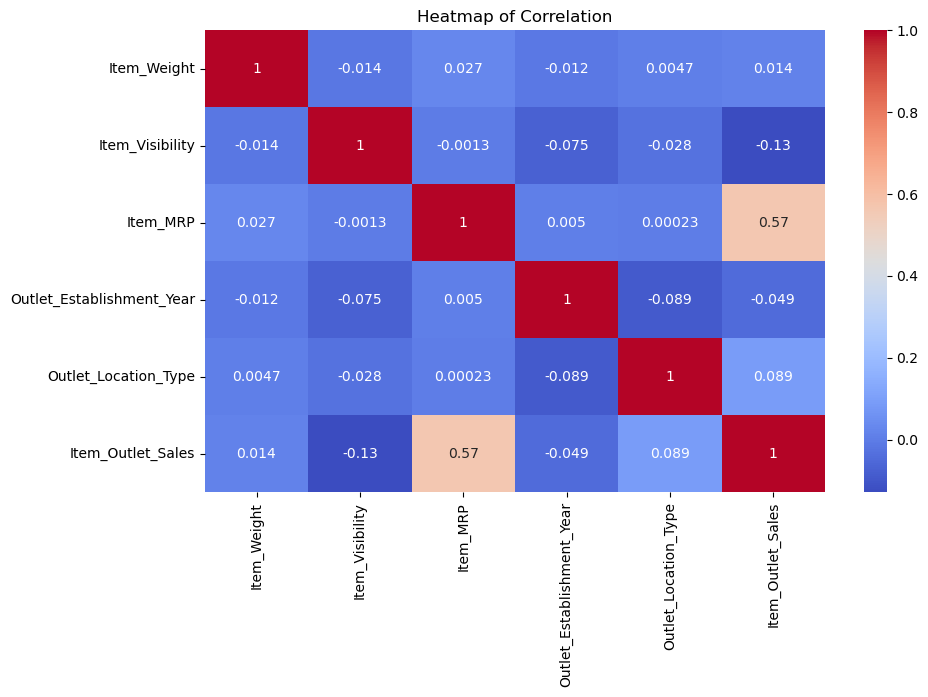

In [29]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a heatmap
ax = sns.heatmap(corr, cmap='coolwarm', annot=True);
ax.set_title('Heatmap of Correlation');

- Here we can see there is a relatively strong correlation between Item MRP and Item Outlet Sales

### Histogram

##### Item Visibility

Let's take a look at a Histogram of Item Visibilty

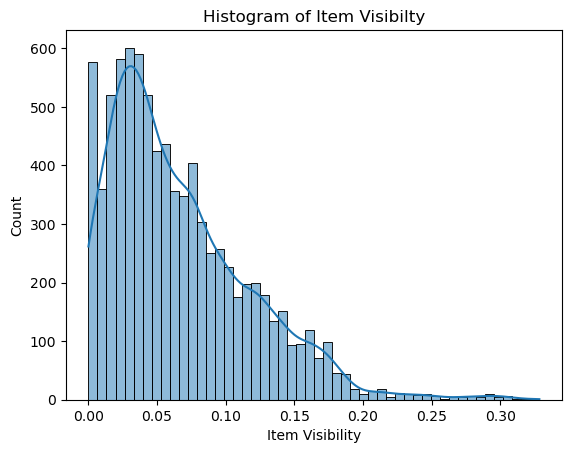

In [30]:
# Creating a histogram of Item Visibility
ax = sns.histplot(data=df, x='Item_Visibility', kde=True)

# setting the title, xlabel, and ylabel
ax.set_title('Histogram of Item Visibilty');
ax.set_xlabel('Item Visibility')
ax.set_ylabel('Count');

Majority of the products have about a .025 visibilty

##### Item Sales

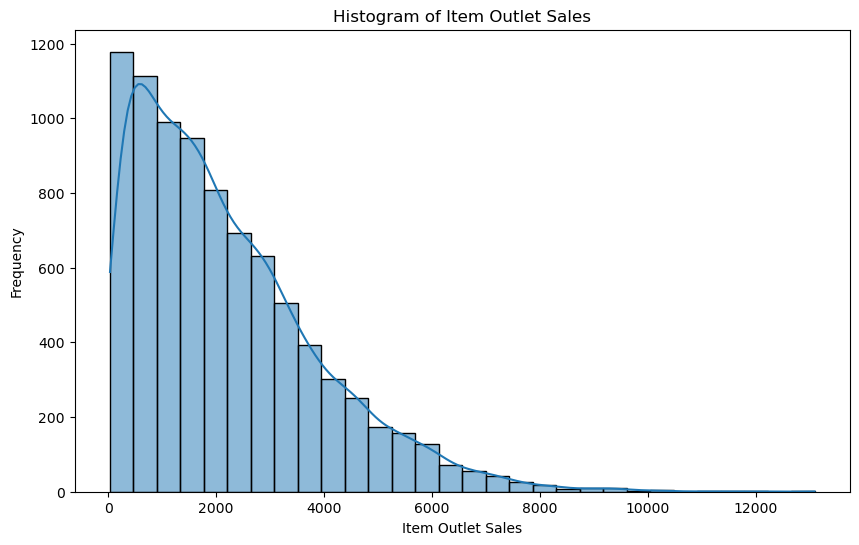

In [31]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating hisogram of item outlet sales
ax = sns.histplot(data=df, x='Item_Outlet_Sales', bins=30, kde=True)

# setting the x label, y label, and title
ax.set_xlabel('Item Outlet Sales')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Item Outlet Sales');

Most of the Item Sales were under $1000

##### MRP

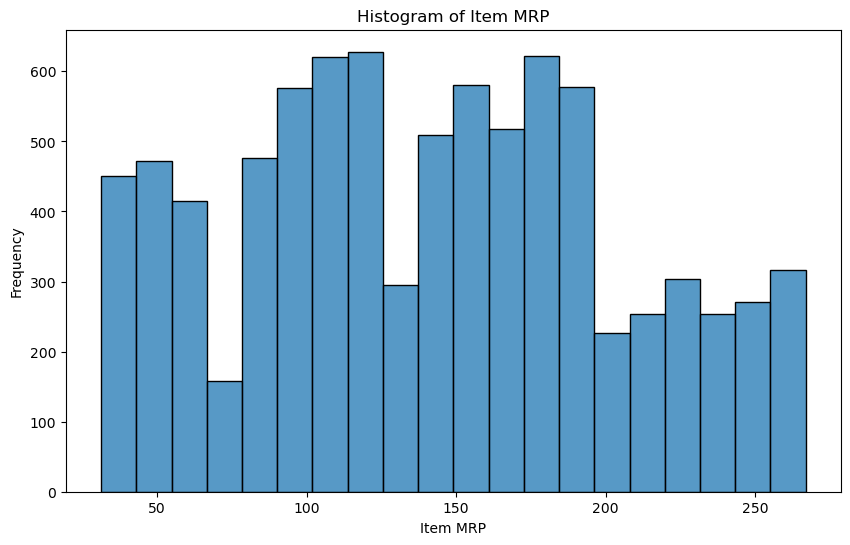

In [32]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# Histogram of Item MRP
ax = sns.histplot(df['Item_MRP'], bins=20, edgecolor='black')

# setting the xlabel, ylabel, and title
ax.set_xlabel('Item MRP')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Item MRP');

As you can see from the histogram above, the majority MRP is around $100

### Countplot

##### Outlet Types

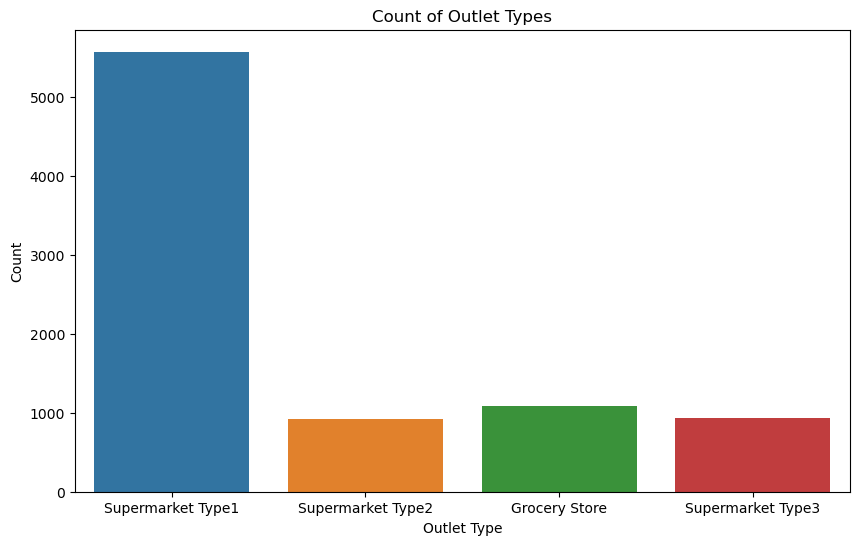

In [33]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a countplot of outlet type
ax = sns.countplot(data=df, x='Outlet_Type')

# creating the xlabel, ylabel, and title
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Count')
ax.set_title('Count of Outlet Types');

As you can see from the countplot above, there are more than 4 times the amount of Supermarket Type 1's than any other Outlet Types

##### Outlet Types by Location

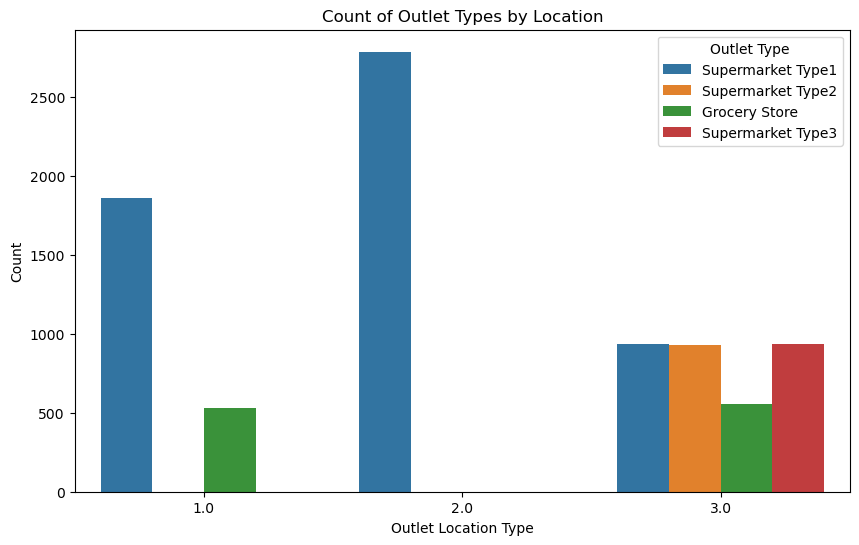

In [34]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a countplot of outlet location type and outlet type
ax = sns.countplot(data=df, x='Outlet_Location_Type', hue='Outlet_Type')

# changing the xlabel, ylabel, title, and setting a legend
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Count')
ax.set_title('Count of Outlet Types by Location')
plt.legend(title='Outlet Type');

From the countplot from above we can see that in Tier 3 locations there is at least one kind of outlet type. In Tier's 1 and 2, Supermarket Type 1 have the most stores with them being the only store in Tier 2.

### Boxplot

##### Outlet Size vs Outlet Sales

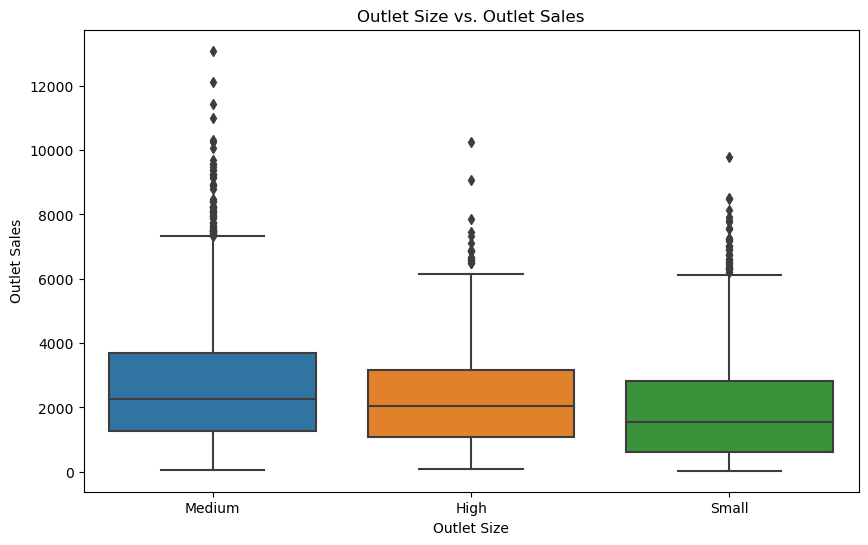

In [35]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a boxplot of the outlet size vs outlet sales
ax = sns.boxplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')

# creating xlabel, ylabel, and title
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Outlet Sales')
ax.set_title('Outlet Size vs. Outlet Sales');

As we can see from the boxplot above, the median sales are higher in the sales location that are larger. In the Medium sized Outlets, there seem to br a lot of outliers. There is a lot of missing information in this dataset which could skew the information per Outlet Size.

##### Outlet Type vs Outlet Sales

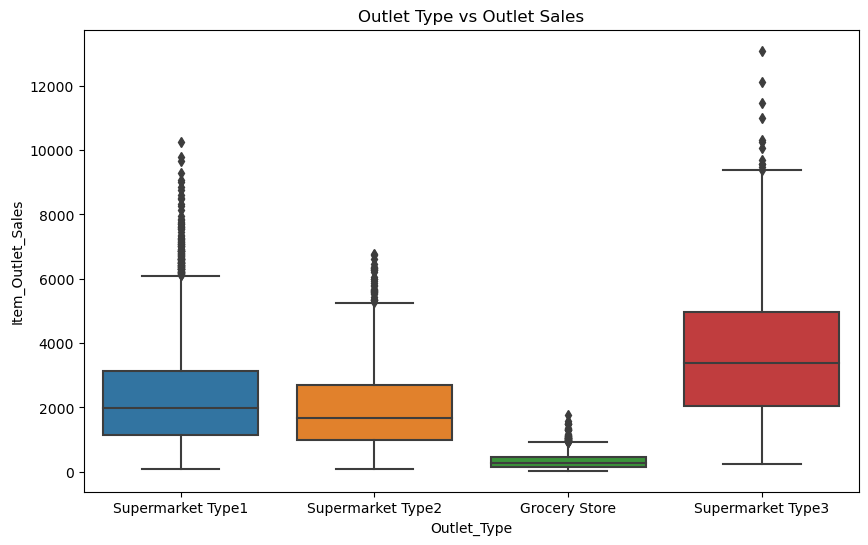

In [36]:
# changing the size of the figure
plt.figure(figsize=(10,6))

# creating a boxplot of the outlet sales vs outlet type
ax = sns.boxplot(data=df, y='Item_Outlet_Sales', x='Outlet_Type')
ax.set_xlabel('Outlet_Type')
ax.set_ylabel('Item_Outlet_Sales');
ax.set_title('Outlet Type vs Outlet Sales');

As you can see clearly from the outlet type, Supermarket Type 3 has the largest amount of Item Sales. Grocery Store does not have many sales compared to the other types of Outlets.

### Barplots

##### Average Sales per Outlet Type

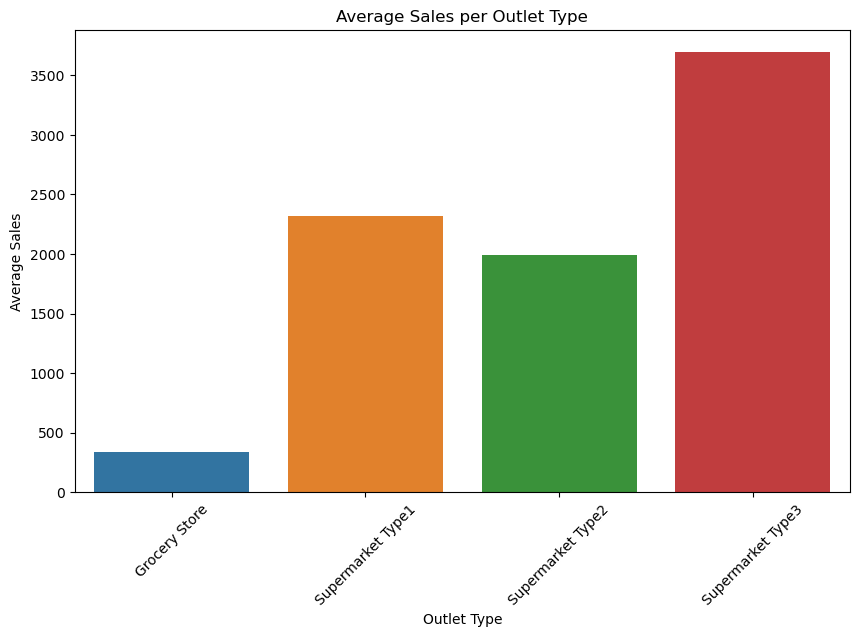

In [37]:
# using groupby to to find the average sales per outlet
average_sales_per_outlet = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index()

# changning the figure size
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=average_sales_per_outlet, x='Outlet_Type', y='Item_Outlet_Sales')

# setting the xlabels, ylabels, title, and rotating the xlabels 45 degrees
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Average Sales')
ax.set_title('Average Sales per Outlet Type')
plt.xticks(rotation=45);

We can see from this graph that the Supermarket Type 3 have the most sales.

##### Average Sale per Item Type

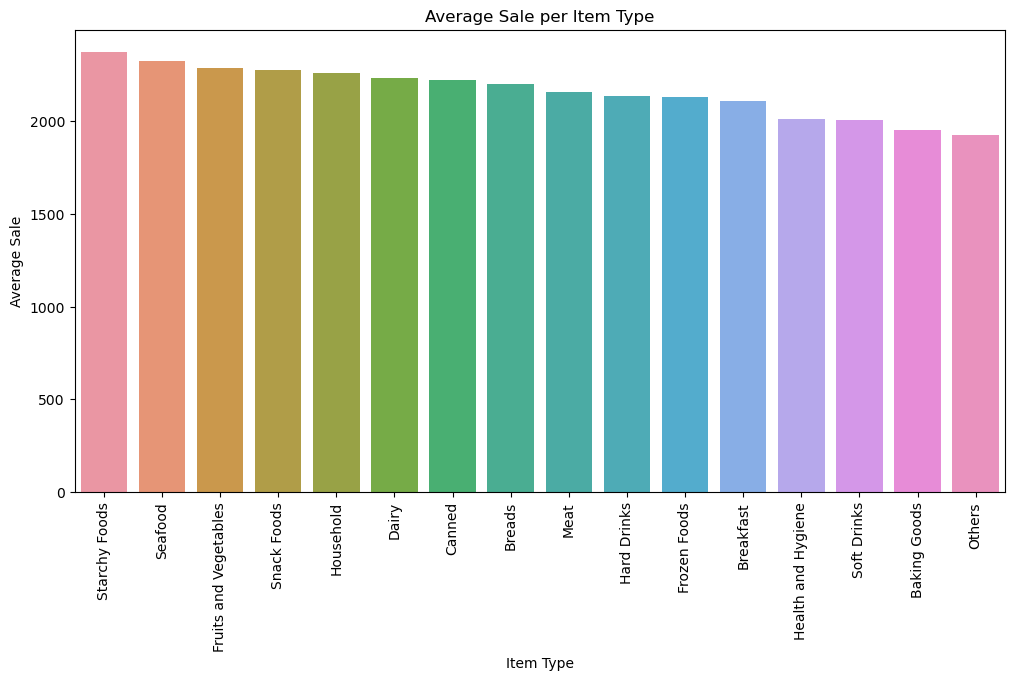

In [38]:
# using groupby to find the average sale per item type
average_sale_per_item = df.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()

# changing the size of the figure
plt.figure(figsize=(12, 6))

# creating a barplot
ax = sns.barplot(data=average_sale_per_item, x='Item_Type', y='Item_Outlet_Sales')

# changing the xlabel, ylabel, title, and rotating the xlabels 90 degrees
ax.set_xlabel('Item Type')
ax.set_ylabel('Average Sale')
ax.set_title('Average Sale per Item Type')
plt.xticks(rotation=90)
plt.show()


This graph shows the Sales per Items. As we can see Starchy Foods sells the most, followed by Seafood, and Fruits and Vegetables.

##### Sales on Low fat vs Regular

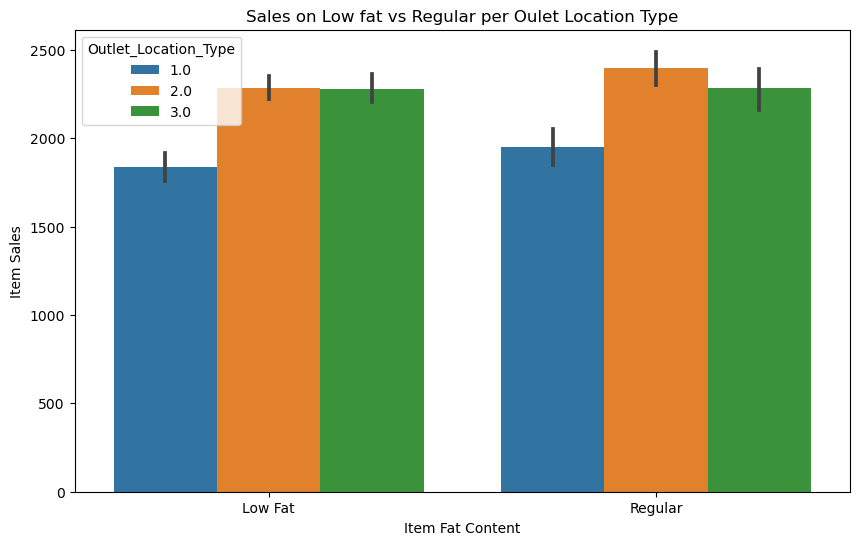

In [39]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=df, x='Item_Fat_Content', y='Item_Outlet_Sales', hue='Outlet_Location_Type')

# changing the xlabel, ylabel, and title
ax.set_xlabel('Item Fat Content')
ax.set_ylabel('Item Sales')
ax.set_title('Sales on Low fat vs Regular per Oulet Location Type');

As we can see from above the Sales per Fat Content does not vary much along with the Outlet Location Type.

##### Sales on Outlet Size

In [40]:
# checking out the sales per outlet size
df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()

,Outlet_Size,Item_Outlet_Sales
0,Medium,2681.603542
1,High,2298.995256
2,Small,1912.149161


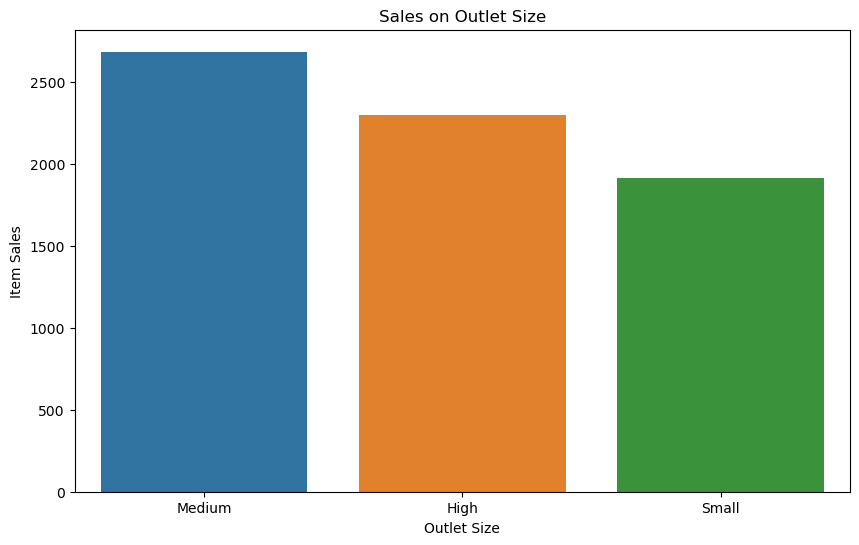

In [41]:
# using groupby to find the average sale per item type
average_sale_per_size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()

# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=average_sale_per_size, x='Outlet_Size', y='Item_Outlet_Sales')

# changing the xlabel, ylabel, and title
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Item Sales')
ax.set_title('Sales on Outlet Size');

As we can see from the graph above, Medium sized stores have the most Item Sales with High Outlet sized stores following right behind it.

##### Sales on Outlet Location Type

In [42]:
# taking a look at sales per Outlet location type
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()

,Outlet_Location_Type,Item_Outlet_Sales
0,2.0,2323.990559
1,3.0,2279.627651
2,1.0,1876.909159


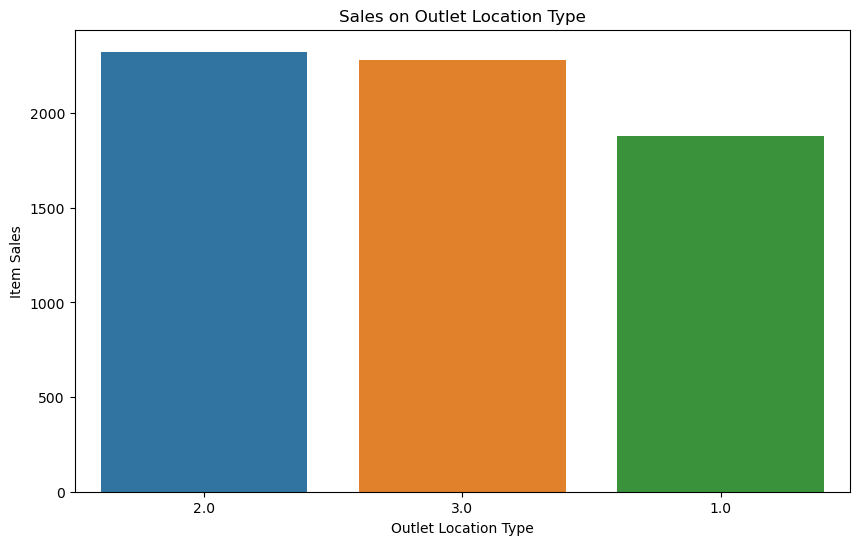

In [43]:
# using groupby to find the average sale per item type
average_sale_per_loc_type = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()

# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=average_sale_per_loc_type, x='Outlet_Location_Type', y='Item_Outlet_Sales',order=average_sale_per_loc_type['Outlet_Location_Type'])

# changing the xlabel, ylabel, and title
ax.set_xlabel('Outlet Location Type')
ax.set_ylabel('Item Sales')
ax.set_title('Sales on Outlet Location Type');

As you can see from the graph above Outlet location type 2 has the largest amount of sales followed by Outlet Location type 3

##### Sales on Outlet Type

In [44]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()

,Outlet_Type,Item_Outlet_Sales
0,Supermarket Type3,3694.038558
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Grocery Store,339.828500


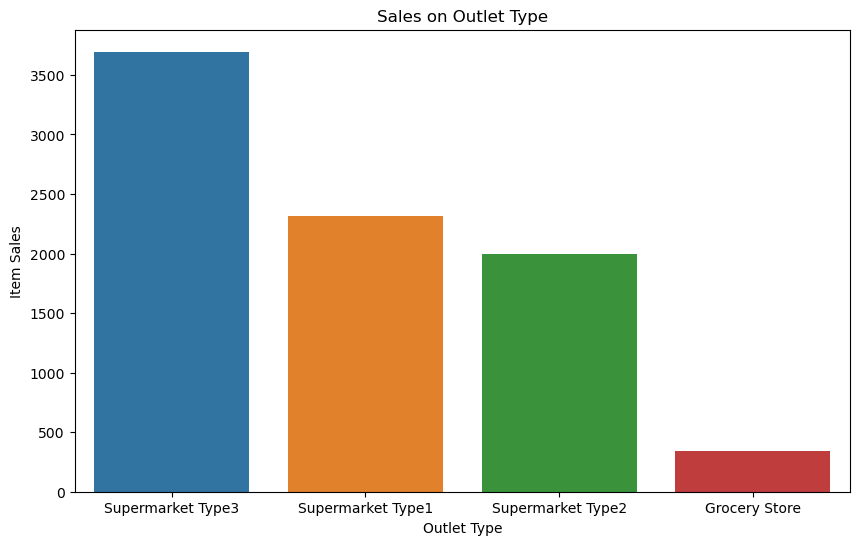

In [45]:
# using groupby to find the average sale per item type
average_sale_per_outlet_type = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).reset_index()

# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a barplot
ax = sns.barplot(data=average_sale_per_outlet_type, x='Outlet_Type', y='Item_Outlet_Sales')

# changing the xlabel, ylabel, and title
ax.set_xlabel('Outlet Type')
ax.set_ylabel('Item Sales')
ax.set_title('Sales on Outlet Type');

As you can see from the graph above, Supermarket Type3 has the most sales by a large amount.

## Explanatory Data Analysis

### Custom Functions

#### Univariate

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# exploring categorical
def explore_categorical(df, x, fillna=True, placeholder='MISSING',
                        figsize=(6,4), order=None):

  # making a copy of the dataframe and na
  temp_df = df.copy()

  # before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_percent = null_count/len(temp_df) * 100

  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # create a figure with desired size
  fig, ax = plt.subplots(figsize=figsize)

  # plotting the countplot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # rotating tick labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # adding a title with the feature name included
  ax.set_title(f'Column: {x}', fontweight='bold')

  # fixing layout and showing plot
  fig.tight_layout()
  plt.show()

  # printing null value info
  print(f"- NaN's found: {null_count} ({null_percent:.2f}%)")

  # print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # fing value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)

  # define most common value
  most_common_val = val_counts.index[0]

  # define the frequency of the most common value
  freq = val_counts.values[0]

  # calculate the percentage of the most common value
  percent_most_common = freq / len(temp_df) * 100

  # print the results
  print(f"- Most common Value: '{most_common_val}' occurs {freq} times ({percent_most_common:.2f}%)")

  # print message if quasi-constant or constan (greater than 98% of data)
  if percent_most_common > 98:
    print("\n - [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print('- Not constant or quasi-constant')

  # returning fig, ax
  return fig, ax

# exploring numeric
def explore_numeric(df, x, figsize=(6,5)):

  # making our figure with gridspec for suubplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)

  # histogram on top
  sns.histplot(data=df, x=x, ax=axes[0])

  # boxplot on bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  # adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  # adjusting subplots to best fill figure
  fig.tight_layout()

  # ensure plot is shown before message
  plt.show()

  # print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_percent = null_count / len(df) * 100
  print(f"- NaN's found: {null_count} ({null_percent:.2f}%)")

#### Multivariate

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt


# plotting categorical vs target
def plot_categorical_vs_target(df, x, y='SalePrice', figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None):

# make a temp copy of the dataframe and fillna
  temp_df = df.copy()

# fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
# or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])

# create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

# barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
            linewidth=1, edgecolor='black', errorbar=None)

# boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
              order=order, hue_order=order, legend=False,
              edgecolor='white', linewidth=0.5, size=3,
              zorder=0)

# rotating the x labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# adding a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

# plotting numeric vs target
def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4)):

  # calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white', 'lw':1, 'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  # adding the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

### Filtering out Columns to use

In [48]:
# filtering out columns
select_cols = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
               'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
               'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']
df = df[select_cols]
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,1.0,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,3.0,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,1.0,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,3.0,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,3.0,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,3.0,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,NaN,2.0,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,2.0,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,3.0,Supermarket Type2,1845.5976


### Observations

#### Item_Weight

Item Weight: Weight of Product

In [49]:
# Checking the data type of Item_Weight to select the correct function
feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

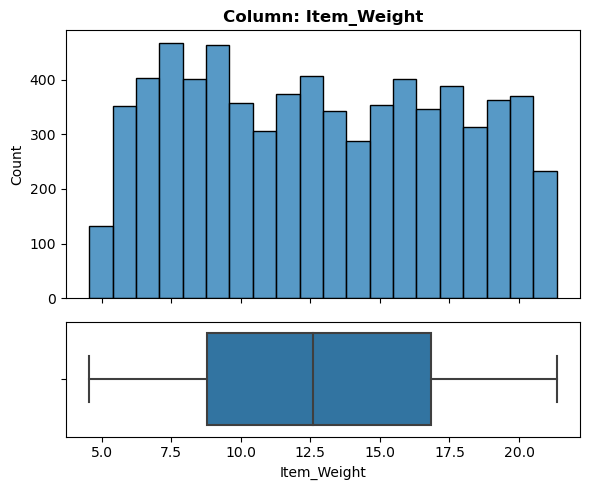

- NaN's found: 1463 (17.17%)


In [50]:
# running the appropriate function
explore_numeric(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 null values, 17.17%.
  - Impute the median

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Not applicable (numeric)
5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



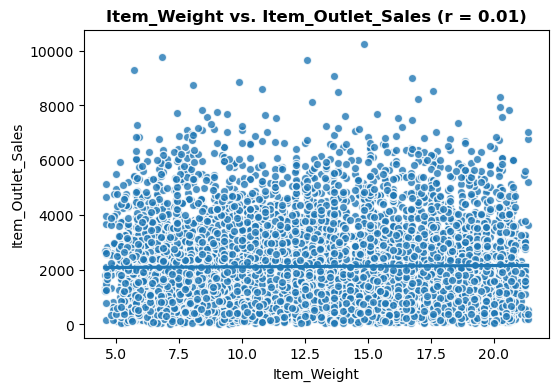

In [51]:
# running the appropriate feature vs target
plot_numeric_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No
  - Does this feature appear to be a predictor of the target?
    - No

___

#### Item_Fat_Content


Item Fat Content: Whether the product is low-fat or regular

In [52]:
# setting the feature and checking the dtype
feature = 'Item_Fat_Content'
df[feature].dtype

dtype('O')

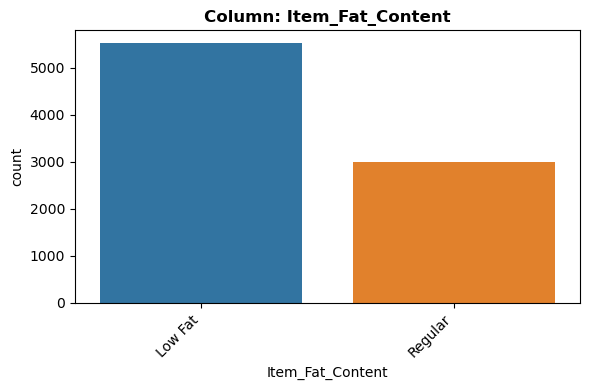

- NaN's found: 0 (0.00%)
- Unique Values: 2
- Most common Value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant


In [53]:
# using the appropriate function
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values, 0%

3. Is the feature constant or quasi-constant?
  - No

4. What is the cardinality? Is it high?
  - Low. Only 2 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



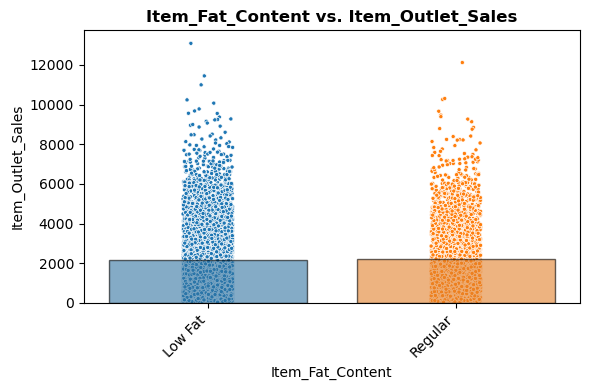

In [54]:
# running appropriate feature vs target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people would buy more Low fat than Regular.
  - Does this feature appear to be a predictor of the target?
    - Not really, both have about the same sales

___

#### Item_Visibility

Item Visibility: The percentage of total display area of all products in a store allocated to the particular product

In [55]:
# checking the data type
feature = 'Item_Visibility'
df[feature].dtype

dtype('float64')

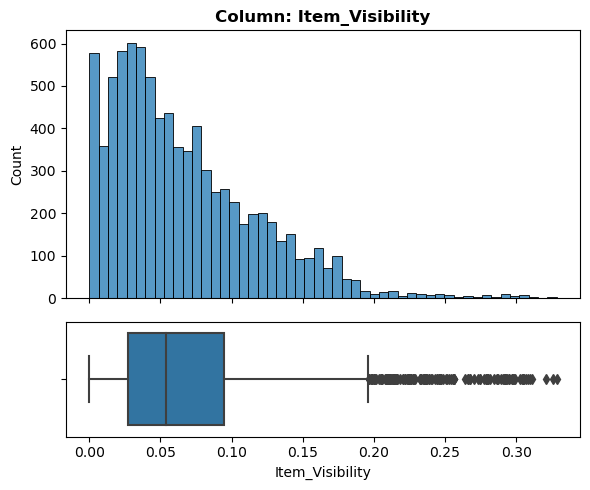

- NaN's found: 0 (0.00%)


In [56]:
# applying the exploring numeric function
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values. 0%

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable, numeric.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



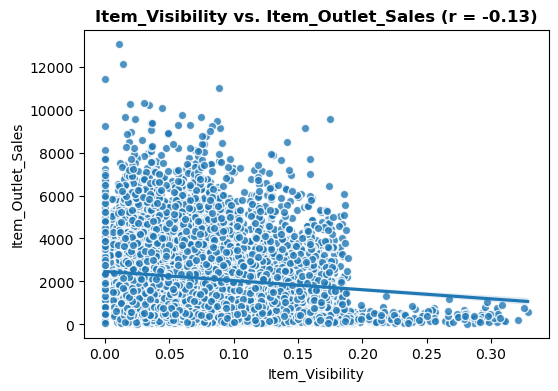

In [57]:
plot_numeric_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the more visible an item is the more sales it'll have
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite of what I expected.

___

#### Item_Type

Item Type: The category to which the product belongs

In [58]:
# finding the dtype of Item_type
feature = 'Item_Type'
df[feature].dtype

dtype('O')

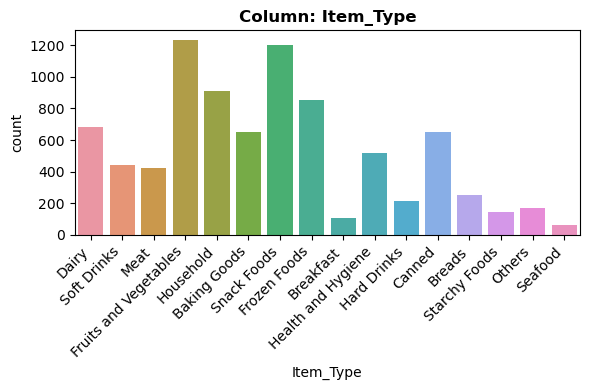

- NaN's found: 0 (0.00%)
- Unique Values: 16
- Most common Value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant


In [59]:
# apply to categorical function
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Cardinality is high. 16 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



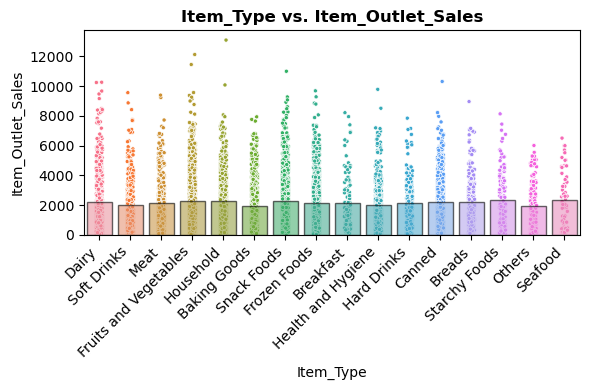

In [60]:
# running appropriate feature vs target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think Snack foods would be bought the most.
  - Does this feature appear to be a predictor of the target?
    - No.

___

#### Item_MRP

Item MRP: Maximum Retail Price (list price) of the product

In [61]:
# finding the dtype
feature = 'Item_MRP'
df[feature].dtype

dtype('float64')

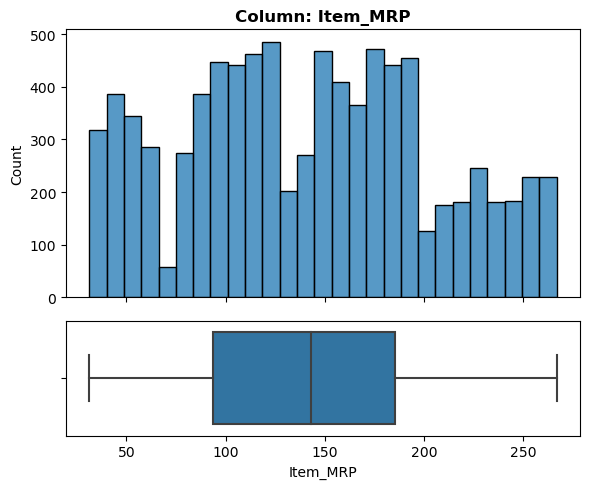

- NaN's found: 0 (0.00%)


In [62]:
# applying to the numeric
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable, numeric.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



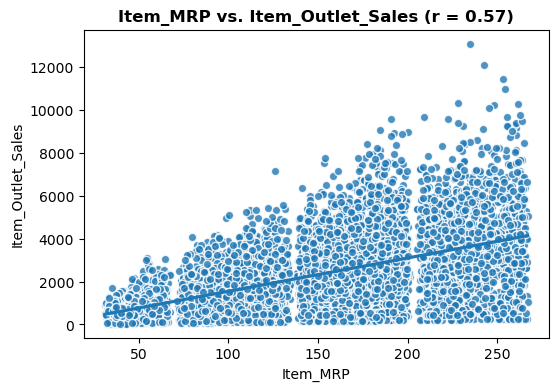

In [63]:
# compare to the target
plot_numeric_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the higher the Item MRP, the more sales.
  - Does this feature appear to be a predictor of the target?
    - Yes.

___

#### Outlet_Establishment_Year


Outlet Establishment Year: The year in which the store was established

In [64]:
# finding the dtype
feature = 'Outlet_Establishment_Year'
df[feature].dtype

dtype('int64')

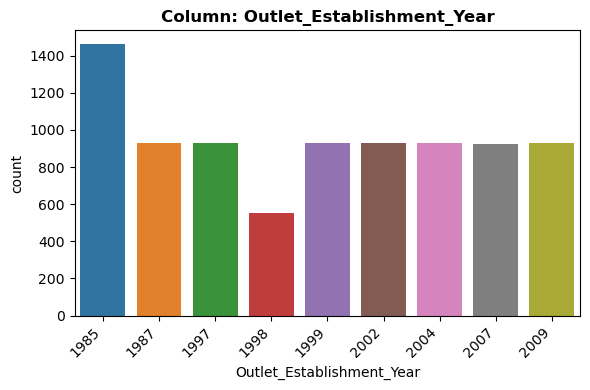

- NaN's found: 0 (0.00%)
- Unique Values: 9
- Most common Value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant


In [65]:
# applying it to the
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No it's not high, there are 9 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



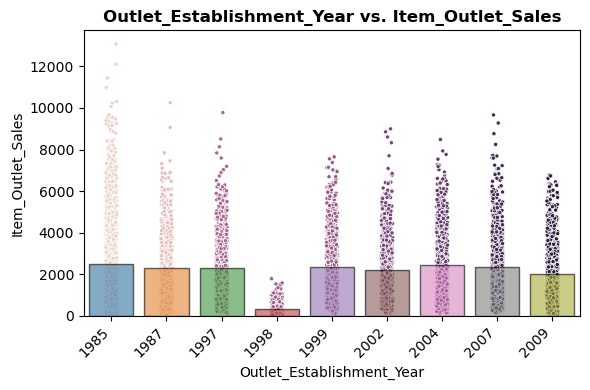

In [66]:
# plotting on the categorical
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the older the store, the more sales it would have.
  - Does this feature appear to be a predictor of the target?
    - Yes.

___

#### Outlet_Size

Outlet Size: The size of the store in terms of ground area covered

In [67]:
# checking the data type
feature = 'Outlet_Size'
df[feature].dtype

dtype('O')

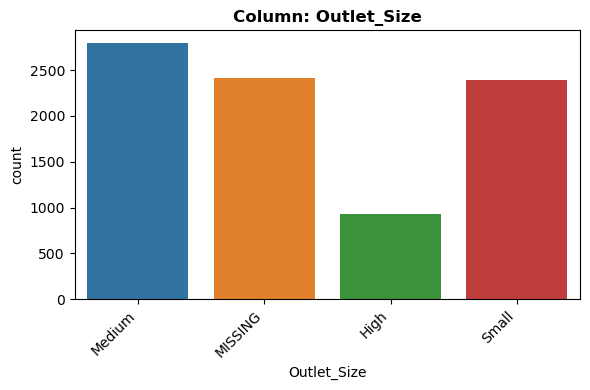

- NaN's found: 2410 (28.28%)
- Unique Values: 4
- Most common Value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant


In [68]:
# running the categorical exploration
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 null values (28.28%), Impute with MISSING

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No it's not high, there are 4 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



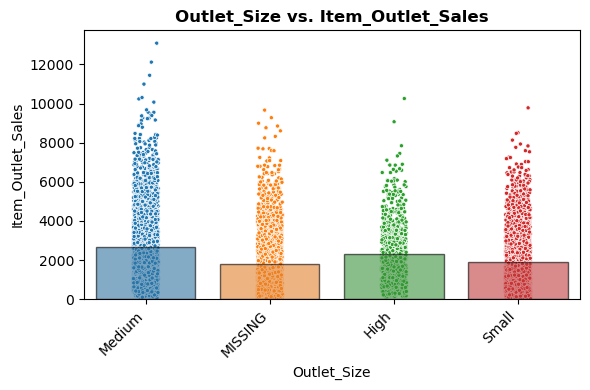

In [69]:
# plotting the categorical to the target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the bigger the size of the store, the more sales it would have.
  - Does this feature appear to be a predictor of the target?
    - Yes, but not how I would expect. The medium size stores have the most sales.

___

#### Outlet_Location_Type


Outlet Location Type: The type of area in which the store is located

In [70]:
# checking the datatype
feature = 'Outlet_Location_Type'
df[feature].dtype

dtype('float64')

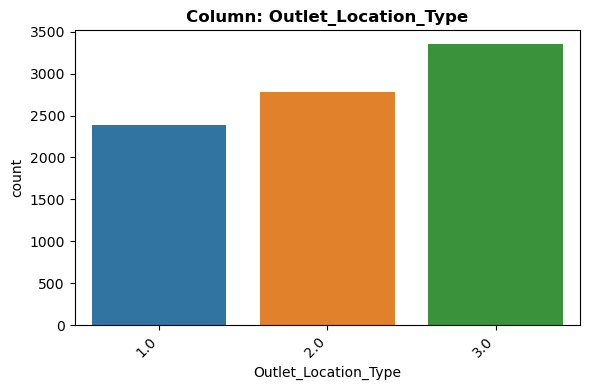

- NaN's found: 0 (0.00%)
- Unique Values: 3
- Most common Value: '3.0' occurs 3350 times (39.31%)
- Not constant or quasi-constant


In [71]:
# exploring the categorical because it is ordinal
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No it's not high, there are 3 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



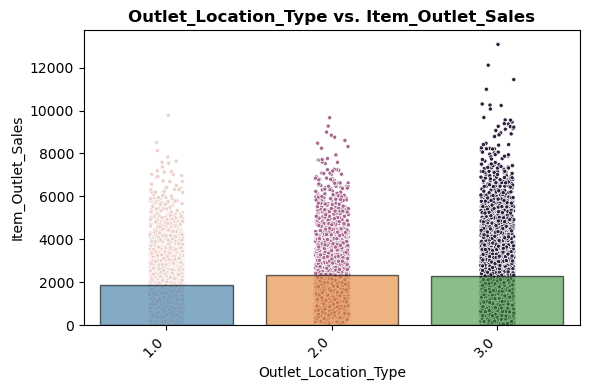

In [72]:
# plotting the categorical to the target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the higher the location type, the more sales it would have.
  - Does this feature appear to be a predictor of the target?
    - Yes, the higher the location type, the more sales it has

___

#### Outlet_Type

Outlet Type: Whether the outlet is a grocery store or some sort of supermarket

In [73]:
# finding the dtype for outlet_type
feature = 'Outlet_Type'
df[feature].dtype

dtype('O')

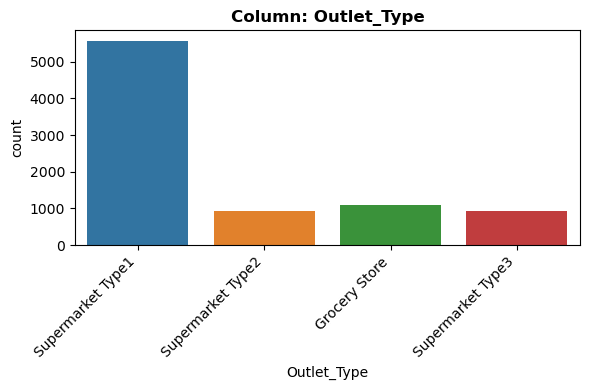

- NaN's found: 0 (0.00%)
- Unique Values: 4
- Most common Value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant


In [74]:
# using categorical exploration
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values (0%)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - No it's not high, there are 4 unique values

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



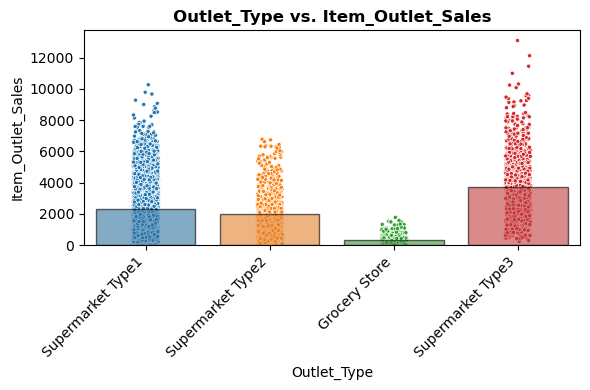

In [75]:
# plotting the categorical to the target
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think the greater the supermarket type, the more sales it'll have.
  - Does this feature appear to be a predictor of the target?
    - Yes, Grocery store has the least sales and Supermarket Type 3 have the most sales

___

#### Item_Outlet_Sales

Item Outlet Sales: Sales of the product in a particular store

In [76]:
# checking the data type
feature = 'Item_Outlet_Sales'
df[feature].dtype

dtype('float64')

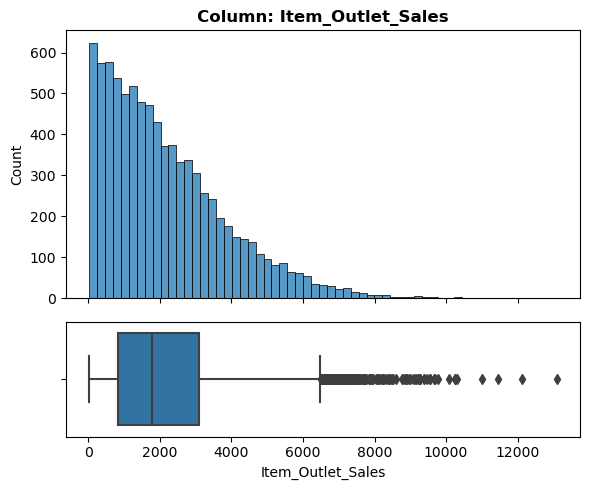

- NaN's found: 0 (0.00%)


In [77]:
# running the explore numeric
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric. our target!

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - Not a feature!

4. What is the cardinality? Is it high?
  - N/A - numeric.

5. Would we know this BEFORE the target is determined?
  - Yes, since it IS our target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!



## Transforming Train/Test Data

### Importing Libraries and Data

#### Importing the libraries

In [78]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
import missingno
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

#### Importing the data

In [79]:
fname = 'Data/sales_predictions_2023.csv'
df = pd.read_csv(fname)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Instructions

- Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)

- Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

- Perform a train test split

- Create a preprocessing object to prepare the dataset for Machine Learning

- Make sure your imputation of missing values occurs after the train test split using SimpleImputer.

### Cleaning the data

#### Dropping Duplicates

In [80]:
df.duplicated().sum()

0

#### Fixing any inconsistencies

In [81]:
cat_cols = df.select_dtypes('object')
for col in cat_cols:
  print(f'Column Name: {col}')
  print(df[col].unique())
  print('\n')

Column Name: Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Column Name: Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Column Name: Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Column Name: Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Column Name: Outlet_Size
['Medium' nan 'High' 'Small']


Column Name: Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Column Name: Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




There is an inconsistency in the Item Fat Content

In [82]:
# Taking a look at Item Fat Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [83]:
# creating a dictionary of names to fix the inconsistencies
name = {'low fat': 'Low Fat',
        'LF': 'Low Fat',
        'reg':'Regular'}

# applying the dictionary to the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(name)

In [84]:
# checking the value counts to see if we fixed the inconsistencies
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Identify the features and target

In [85]:
# identifying the target and features
target = 'Item_Outlet_Sales'

X = df.drop(columns=[target, 'Item_Outlet_Sales'])

y = df[target]

### Performing the train test split

In [86]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Creating a Numeric Preprocessor

In [87]:
# saving a list of column name
num_cols = X_train.select_dtypes('number').columns
print('Numeric Columns:', num_cols)

# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

# make numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

#### Defining Numeric Tuple for Column Transformer

In [88]:
# defining numeric tuple
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

### Creating an Ordinal Preprocessor

In [89]:
# preprocessing for Ordinal data
# saving the list of column names
ord_cols = ['Outlet_Location_Type']
print('Ordinal Columns:', ord_cols)

# create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')

### Making the OrdinalEncoder
# specifying the order of the of the categories for Ordinal Location Type
tier_order = ['Tier 1', 'Tier 2', 'Tier 3']

# making the list of order lists for OrdinalEncoder
ordinal_category_order = [tier_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_order)

# making a final scaler to scale category's
scaler_ord = StandardScaler()

# making an ord pipeline
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Ordinal Columns: ['Outlet_Location_Type']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

#### Defining an Ordinal Tuple for Column Transformer

In [90]:
# making an Ordinal tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Location_Type'])

### Creating a Categorical Preprocessor

In [91]:
# preprocessing pipeline for one hot encoded data
ohe_cols = X_train[['Item_Fat_Content','Outlet_Size', 'Outlet_Type']].columns
print('OneHotEncoder Columns:', ohe_cols)

# instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# make pipeline with impute and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)

OneHotEncoder Columns: Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type'], dtype='object')


#### Defining Categorical Tuple

In [92]:
# making ohe_tuple
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type'], dtype='object'))

### Column Transformer

#### Create one column transformer object

In [93]:
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

#### Fit the Column transformer object to the training data

In [94]:
# fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

#### Saving the Transformed training data

In [95]:
X_train_processed = col_transformer.transform(X_train)

In [96]:
# display first 5 rows
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,1.084948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,1.084948,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,-1.384777,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.149914,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-0.149914,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### Saving the Transformed Test data

In [97]:
# saving the transformed testing data
X_test_processed = col_transformer.transform(X_test)

In [98]:
# viewing first 5 rows
X_test_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7503,0.341372,-0.776646,-0.998816,-1.293807,1.084948,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2957,-1.169135,0.100317,-1.585194,-0.102145,-1.384777,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7031,0.388798,-0.482994,-1.595784,0.136187,-1.384777,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1084,-0.049889,-0.415440,0.506592,-1.532139,1.084948,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
856,-0.632039,-1.047426,0.886725,0.732018,-0.149914,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Models

### Linear Regression Model

#### Importing the Model

In [99]:
# import the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
linreg = LinearRegression()

# combine the preprocessing ColumnTransformer and linear regression model
linreg_pipe = make_pipeline(col_transformer, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                  ['Outlet_Location_Type']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [100]:
# importing custom function
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

##### Fit the Model

In [101]:
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                  ['Outlet_Location_Type']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

#### Evaluating the Model

In [102]:
# Evaluating
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 848.497
- MSE = 1,300,243.723
- RMSE = 1,140.282
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 802.197
- MSE = 1,186,970.495
- RMSE = 1,089.482
- R^2 = 0.570


We can conclude that the model is not significantly overfit or underfit. It appears to be performing reasonably well and has a similar level of predictive accuracy on both the training and test data sets.

### Bagged Trees Regressor

In [103]:
# importing the regressor and gridsearch
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

# instantiate the default model
bagreg = BaggingRegressor(random_state=42)

# model pipeline with default preprocessor and default model
bagreg_pipe = make_pipeline(col_transformer, bagreg)

# fit the model on training data
bagreg_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value=...
                                                  ['Outlet_Location_Type']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('baggingregressor', BaggingRegressor(random_state=42))])

#### Default Bagged Tree Regressor model

In [104]:
# call custom function
evaluate_regression(bagreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 320.876
- MSE = 239,847.835
- RMSE = 489.743
- R^2 = 0.919

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 795.198
- MSE = 1,306,771.261
- RMSE = 1,143.141
- R^2 = 0.526


#### Getting Params

In [105]:
# getting parameters
bagreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='NA',
                                                                   strategy='constant')),
                                                    ('ordinale...
                                                                                 '3']])

#### Defining Parameters to tune

In [106]:
# define parameters to tune
param_grid = {'baggingregressor__n_estimators': [5, 10 , 20, 30, 40, 50],
              'baggingregressor__max_samples': [.5, .7, .9, ],
              'baggingregressor__max_features': [.5, .7, .9]}

# instantiate the grid search
gridsearch = GridSearchCV(bagreg_pipe, param_grid, n_jobs=-1, verbose=1)

# fit gridsearch on training data
gridsearch.fit(X_train, y_train)

# best params from grid search
gridsearch.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'baggingregressor__max_features': 0.9,
 'baggingregressor__max_samples': 0.5,
 'baggingregressor__n_estimators': 50}

#### Tuned Bagged Tree Regressor Model

In [107]:
# define model with best params already refit on entire training data
best_bagreg_grid = gridsearch.best_estimator_

# evaluate the tuned model
evaluate_regression(best_bagreg_grid, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 488.676
- MSE = 487,188.234
- RMSE = 697.989
- R^2 = 0.835

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 756.837
- MSE = 1,163,912.604
- RMSE = 1,078.848
- R^2 = 0.578


### Random Forest

#### Default Model

In [108]:
# instantiate default random forest model
#from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(random_state=42)

# model pipeline
#rf_pipe = make_pipeline(col_transformer, rf)

##### Fitting the model

In [109]:
# fit the model pipeline on the training data
#rf_pipe.fit(X_train, y_train)

##### Evaluating the default Model

In [110]:
# using custome function to evaluate default model
#evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

Based on the R-squared values of the test data for the Random Forest Regressor (0.554), the linear regression model(0.570) outperforms the Random Forest Regressor model.

#### Tuning the Model

##### Getting the Params

In [111]:
# getting rf_pipe params
#rf_pipe.get_params()

##### Defining Param Grid

In [112]:
#params = {'randomforestregressor__max_depth': [None,10,15,20],
          #'randomforestregressor__n_estimators':[10,100,150,200],
          #'randomforestregressor__min_samples_leaf':[2,3,4],
          #'randomforestregressor__max_features':['sqrt','log2',None],
          #'randomforestregressor__oob_score':[True,False],
          #}

In [113]:
# instantiate the gridsearch
#gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, verbose=1)

# fit gridsearch onto data
#gridsearch.fit(X_train, y_train)

##### Getting the best params

In [114]:
# obtaining the best params
#gridsearch.best_params_

In [115]:
# define and refit best model
#best_rf = gridsearch.best_estimator_

# evaluate the best model
#evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

## Evaluation

### Interpreting model's performance based on R-Squared.



> **Overview of the model's performance:**
- For the Linear Regression model, the R-squared is 0.561 on the training data and 0.570 on the test data, for the Bagged Tree Regressor model the R-squared is 0.835 on the test data and 0.578 on the test data, and the R-squared on the Random Forest Model is 0.701 on the training data and 0.595 on the test data.


> **Comparing Linear Regression to Random Forest:**
- Approximately 56.1% of the variance in the target variable can be explained by the Linear Regression model on the training data, and about 57% on the test data.
- Approximately 83.5% of the varianxe in the target variable can be explained by the Bagged Tree Regressor Model on the training data, and about 57.8% on the test data.
- Approximately 70.1% of the variance in the target variable can be explained by the Random Forest model on the training data, and about 60% on the test data.


> **Final thoughts:**
- A higher R-squared value indicates that the model captures a larger portion of the variability in the data. In this case, both models have similar R-squared values, but the Random Forest model performs better overall.

### Selecting another regression metric (RMSE/MAE/MSE) to express the performance of the model.



> MAE
- I chose MAE as the additional regression metric to express the performance of the model to stakeholders. MAE represents the average absolute difference between the predicted and actual values. It provides a straightforward understanding of the average prediction error in the original unit of the target variable.

> Why MAE?
- MAE is useful because it gives stakeholders a clear measure of the average prediction error made by the model. In this case, for the Random Forest model, the MAE on the test data is 736.676. This means that, on average, the model's predictions deviate by approximately 737 dollars from the actual value. This information helps stakeholders gauge the magnitude of errors made by the model.




### Comparing the training vs test scores


> To what extent is this model overfit/underfit?
- The Random Forest model outperforms the Linear Regression model and Bagged Tree Regressor on all the metrics for both training and test data. The Random Forest model has higher R-squared, lower MAE, MSE, and RMSE values compared to the Linear Regression model and Bagged Tree Regressor model.
- The Random Forest model demonstrates some degree of overfitting, as it performs better on the training data than on the test data.



# Project 1 - Revisited

## Imports

In [116]:
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set pandas to display more columns
pd.set_option('display.max_columns',100)

## Custom Functions

In [117]:
def plot_importance(importances, top_n=None,  figsize=(8,6)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

In [141]:
def annotate_hbars(ax, ha='left', va='center', size=12, xytext=(4,0),
                  textcoords='offset points'):
    for bar in ax.patches:
    
        ## calculate center of bar
        bar_ax = bar.get_y() + bar.get_height() / 2
        ## get the value to annotate
        val = bar.get_width()
        if val < 0:
            val_pos = 0
        else:
            val_pos = val
        # ha and va stand for the horizontal and vertical alignment
        ax.annotate(f"{val:.3f}", (val_pos,bar_ax), ha=ha, va=va, size=size,
                        xytext=xytext, textcoords=textcoords)

In [118]:
def plot_coeffs(coeffs, top_n=None, figsize=(4,5), 
                intercept=False, intercept_name="intercept", 
                annotate=False, ha='left', va='center', size=12, 
                xytext=(4,0), textcoords='offset points'):
    """ Plots the top_n coefficients from a Series, with optional annotations.
    """
    # Drop intercept if intercept=False and 
    if (intercept == False) & (intercept_name in coeffs.index):
        coeffs = coeffs.drop(intercept_name)
    if top_n == None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        
        ## sort features and keep top_n and set title
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        title = f"Top {top_n} Largest Coefficients"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
            ylabel='Feature Names', 
            title=title)
    ax.axvline(0, color='k')
    if annotate == True:
        annotate_hbars(ax, ha=ha, va=va, size=size, xytext=xytext, textcoords=textcoords)
    return ax

In [119]:
def get_importances(model, feature_names=None,name='Feature Importance',
                   sort=False, ascending=True):
    
    ## checking for feature names
    if feature_names == None:
        feature_names = model.feature_names_in_
        
    ## Saving the feature importances
    importances = pd.Series(model.feature_importances_, index= feature_names,
                           name=name)
    
    # sort importances
    if sort == True:
        importances = importances.sort_values(ascending=ascending)
        
    return importances

In [120]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [121]:
def plot_importance_color(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

In [122]:
def plot_importance_color_ax(importances, top_n=None,  figsize=(8,6), 
                          color_dict=None, ax=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors, ax=ax)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize, ax=ax)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

In [123]:
def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [124]:
def get_coeffs_linreg(lin_reg, feature_names = None, sort=True,ascending=True,
                     name='LinearRegression Coefficients'):
    if feature_names is None:
        feature_names = lin_reg.feature_names_in_
    ## Saving the coefficients
    coeffs = pd.Series(lin_reg.coef_, index= feature_names)
    coeffs['intercept'] = lin_reg.intercept_
    if sort==True:
        coeffs = coeffs.sort_values(ascending=ascending)
    return coeffs

In [125]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
        
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    ## return ax in case want to continue to update/modify figure
    return ax

## Train/Test Split

In [126]:
# Make X and y variables
y = df['Item_Outlet_Sales']

X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])

## train-test-split with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,7.220,Regular,0.064142,Baking Goods,61.2510,OUT010,1998,NaN,Tier 3,Grocery Store
7604,6.135,Low Fat,0.079294,Soft Drinks,111.2860,OUT018,2009,Medium,Tier 3,Supermarket Type2
2762,12.150,Low Fat,0.028593,Household,151.0708,OUT035,2004,Small,Tier 2,Supermarket Type1
6464,5.945,Low Fat,0.093009,Household,127.8652,OUT035,2004,Small,Tier 2,Supermarket Type1
4707,18.200,Regular,0.066285,Fruits and Vegetables,247.2092,OUT035,2004,Small,Tier 2,Supermarket Type1


## Preprocessing

In [127]:
# saving a list of column name
num_cols = X_train.select_dtypes('number').columns

# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

# make numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)

# making a numeric tuple
num_tuple = ('numeric', num_pipe, num_cols)


# preprocessing for Ordinal data
# saving the list of column names
# ord_cols = ['Outlet_Location_Type']

# # create imputer for ordinal data
# impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')

# ### Making the OrdinalEncoder
# # specifying the order of the of the categories for Ordinal Location Type
# tier_order = ['Tier 1', 'Tier 2', 'Tier 3']

# # making the list of order lists for OrdinalEncoder
# ordinal_category_order = [tier_order]
# ord_encoder = OrdinalEncoder(categories=ordinal_category_order)

# # making a final scaler to scale category's
# scaler_ord = StandardScaler()

# # making an ord pipeline
# ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)

# # making an Ordinal tuple for ColumnTransformer
# ord_tuple = ('ordinal', ord_pipe, ord_cols)

# preprocessing pipeline for one hot encoded data
ohe_cols = X_train[['Item_Fat_Content','Outlet_Size', 'Outlet_Type']].columns

# instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# make pipeline with impute and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)

# making ohe_tuple
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

In [128]:
preprocessor = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Outlet_Size', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [129]:
# fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_NA', 'Outlet_Size_Small',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

## Saving to a DataFrame

In [130]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                         columns = feature_names, index=X_train.index)
X_train_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8269,-1.307488,-0.043295,-1.268171,0.026015,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7604,-1.562856,0.248066,-0.459996,1.338206,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2762,-0.147150,-0.726880,0.182616,0.741756,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [131]:
X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                        columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_NA,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8077,0.582474,-0.093503,-0.120626,1.099626,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2391,1.194417,-0.421698,-0.204533,-0.093275,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
163,-1.295720,0.090081,-0.412092,-0.093275,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [132]:
# confirm the first 3 rows index in y_test to make sure it matches X_test_df
y_test.head(3)

8077    1696.4584
2391    2024.0320
163     2618.5914
Name: Item_Outlet_Sales, dtype: float64

## Linear Regression

In [133]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
8269,7.220,Regular,0.064142,Baking Goods,61.2510,OUT010,1998,NaN,Tier 3,Grocery Store
7604,6.135,Low Fat,0.079294,Soft Drinks,111.2860,OUT018,2009,Medium,Tier 3,Supermarket Type2
2762,12.150,Low Fat,0.028593,Household,151.0708,OUT035,2004,Small,Tier 2,Supermarket Type1
6464,5.945,Low Fat,0.093009,Household,127.8652,OUT035,2004,Small,Tier 2,Supermarket Type1
4707,18.200,Regular,0.066285,Fruits and Vegetables,247.2092,OUT035,2004,Small,Tier 2,Supermarket Type1


In [134]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train_df, y_train)

# Predict on the test data
y_pred = model.predict(X_test_df)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Get the coefficients of the model
coefficients = model.coef_

# Create a DataFrame to store coefficients and their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X_train_df.columns, 'Coefficient': coefficients})

evaluate_regression(model, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.56	RMSE= 1116.09
Test Data:	R^2= 0.56	RMSE= 1162.62


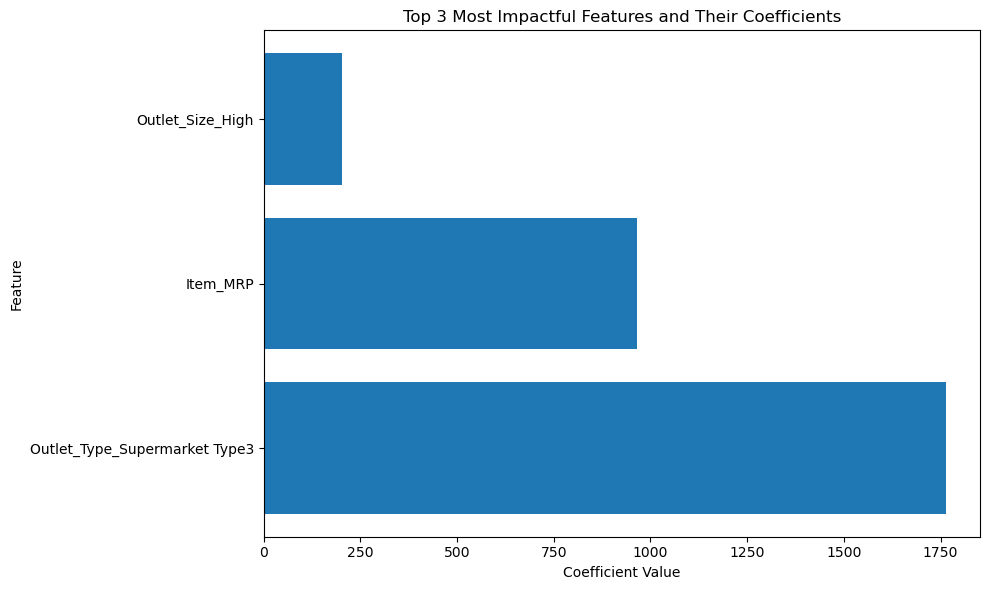

In [135]:
# Sort the DataFrame by coefficient values to find the top 3 most impactful features
top_features = coefficients_df.sort_values(by='Coefficient', ascending=False).head(3)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 3 Most Impactful Features and Their Coefficients')
plt.tight_layout()

# Save the figure as a .png file
plt.savefig('coefficients.png')

# Show the plot (optional)
plt.show()

# Interpret the top 3 features
top_features_names = top_features['Feature'].tolist()
top_features_coeffs = top_features['Coefficient'].tolist()

**Outlet_Type_Supermarket Type3 (Coefficient: 1,763.68):**

- The coefficient for "Outlet_Type_Supermarket Type3" is 1,763.68.


- This positive coefficient suggests that when the outlet type is "Supermarket Type3," it contributes significantly to an increase in "Item_Outlet_Sales."


- Sales in "Supermarket Type3" outlets are expected to be approximately $1,763.68 higher, on average, compared to other types of outlets when all other factors are held constant.


**Item_MRP (Coefficient: 965.06):**

- The coefficient for "Item_MRP" is 965.06.


- This positive coefficient indicates that for each unit increase in the Maximum Retail Price (MRP) of an item, "Item_Outlet_Sales" is expected to increase by approximately $965.06, on average, assuming all other factors remain the same.


- Items with higher maximum retail prices tend to have a significant positive impact on sales.


**Outlet_Size_High (Coefficient: 202.39):**

- The coefficient for "Outlet_Size_High" is 202.39.


- A positive coefficient for "Outlet_Size_High" suggests that when the outlet size is categorized as "High," it has a positive effect on "Item_Outlet_Sales."


- When compared to outlets to smaller sizes, outlets with a "High" size are associated with an average increase of approximately $202.39 in "Item_Outlet_Sales," assuming all other factors remain constant.

In [139]:
## Saving the coeffs
coeffs = pd.Series(model.coef_, index=feature_names)
coeffs['intercept'] = model.intercept_
coeffs

Item_Weight                         4.472777
Item_Visibility                   -12.417342
Item_MRP                          965.056468
Outlet_Establishment_Year         158.808114
Item_Fat_Content_Low Fat          -25.536234
Item_Fat_Content_Regular           25.536234
Outlet_Size_High                  202.393905
Outlet_Size_Medium                  5.513303
Outlet_Size_NA                   -188.224714
Outlet_Size_Small                 -19.682495
Outlet_Type_Grocery Store       -1554.378859
Outlet_Type_Supermarket Type1     167.694226
Outlet_Type_Supermarket Type2    -376.994722
Outlet_Type_Supermarket Type3    1763.679355
intercept                        2134.826659
dtype: float64

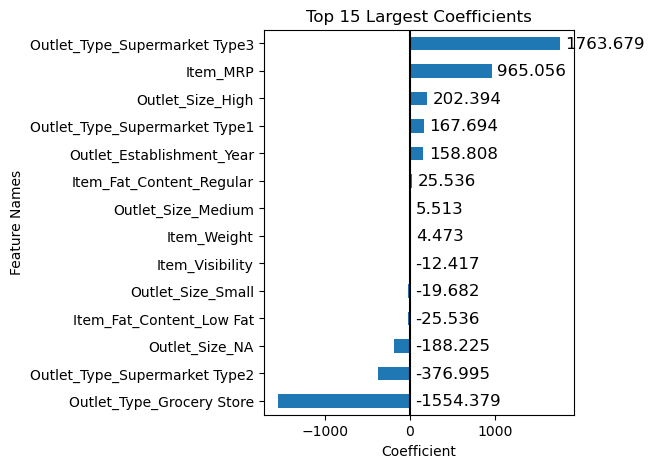

In [142]:
ax = plot_coeffs(coeffs, top_n=15)
annotate_hbars(ax)

## Random Forest

In [143]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 423.36
Test Data:	R^2= 0.55	RMSE= 1184.19


In [144]:
reg.feature_importances_

array([0.0694195 , 0.1252229 , 0.47073123, 0.04229184, 0.00683282,
       0.00695623, 0.00325569, 0.00569201, 0.00609158, 0.00754904,
       0.19675819, 0.00259946, 0.00188984, 0.05470966])

In [145]:
# checking the number of feature importances matched the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

14
14


True

In [146]:
# Saving the feature importances
importances = pd.Series(reg.feature_importances_, index=feature_names,
                       name = 'Feature Importance')
importances

Item_Weight                      0.069420
Item_Visibility                  0.125223
Item_MRP                         0.470731
Outlet_Establishment_Year        0.042292
Item_Fat_Content_Low Fat         0.006833
Item_Fat_Content_Regular         0.006956
Outlet_Size_High                 0.003256
Outlet_Size_Medium               0.005692
Outlet_Size_NA                   0.006092
Outlet_Size_Small                0.007549
Outlet_Type_Grocery Store        0.196758
Outlet_Type_Supermarket Type1    0.002599
Outlet_Type_Supermarket Type2    0.001890
Outlet_Type_Supermarket Type3    0.054710
Name: Feature Importance, dtype: float64

In [147]:
importances.sum()

0.9999999999999999

In [148]:
# Saving the feature importances sorted from largest to smalles (ascending=False)
sorted_importance = importances.sort_values(ascending=False)
sorted_importance

Item_MRP                         0.470731
Outlet_Type_Grocery Store        0.196758
Item_Visibility                  0.125223
Item_Weight                      0.069420
Outlet_Type_Supermarket Type3    0.054710
Outlet_Establishment_Year        0.042292
Outlet_Size_Small                0.007549
Item_Fat_Content_Regular         0.006956
Item_Fat_Content_Low Fat         0.006833
Outlet_Size_NA                   0.006092
Outlet_Size_Medium               0.005692
Outlet_Size_High                 0.003256
Outlet_Type_Supermarket Type1    0.002599
Outlet_Type_Supermarket Type2    0.001890
Name: Feature Importance, dtype: float64

In [149]:
# saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance

Outlet_Type_Supermarket Type2    0.001890
Outlet_Type_Supermarket Type1    0.002599
Outlet_Size_High                 0.003256
Outlet_Size_Medium               0.005692
Outlet_Size_NA                   0.006092
Item_Fat_Content_Low Fat         0.006833
Item_Fat_Content_Regular         0.006956
Outlet_Size_Small                0.007549
Outlet_Establishment_Year        0.042292
Outlet_Type_Supermarket Type3    0.054710
Item_Weight                      0.069420
Item_Visibility                  0.125223
Outlet_Type_Grocery Store        0.196758
Item_MRP                         0.470731
Name: Feature Importance, dtype: float64

Training Data:	R^2= 0.94	RMSE= 423.36
Test Data:	R^2= 0.55	RMSE= 1184.19


<Axes: title={'center': 'Top 5 Most Important Features'}, xlabel='Importance', ylabel='Feature Names'>

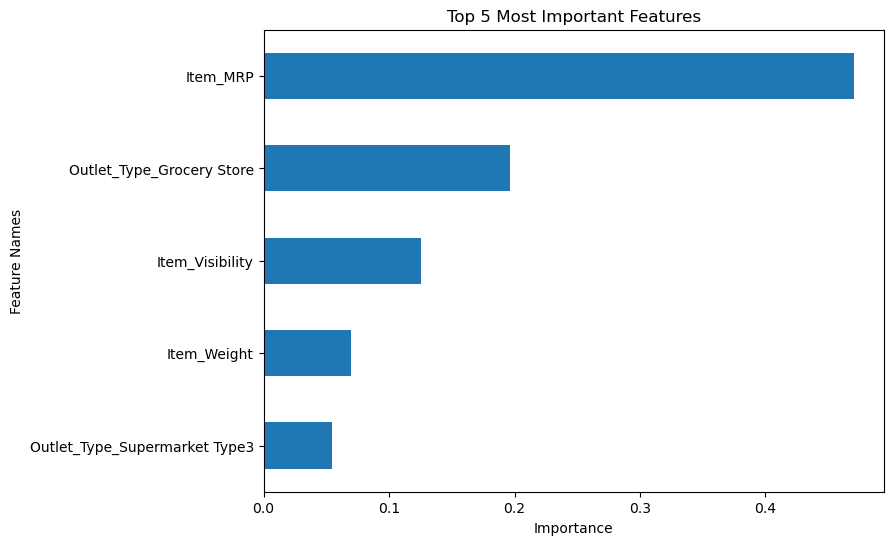

In [150]:
## Fit random forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train_df, y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)
#Saving the feature importances
importances = get_importances(reg)
plot_importance(importances, top_n=5)

**Item_MRP (0.443900):**

- This feature has the highest importance score, which indicates that it has the most significant impact on "Item_Outlet_Sales."

- For each unit increase in the "Item_MRP" (Maximum Retail Price), we can expect, on average, an increase of approximately 0.443900 units in "Item_Outlet_Sales,". 
- This means that items with higher maximum retail prices tend to contribute more to total outlet sales.


**Outlet_Type_Grocery Store (0.196758):**

- This feature represents the type of outlet, specifically "Grocery Store."
- An importance score of 0.196758 suggests that the type of outlet being a "Grocery Store" is the second most important factor affecting "Item_Outlet_Sales."
- This indicates that sales in grocery stores significantly differ from other outlet types, and these stores have a notable impact on overall sales.


**Item_Visibility (0.096981):**

- "Item_Visibility" is the third most important feature, with an importance score of 0.096981.
- An increase in the visibility of items on the shelves (e.g., through better placement or promotion) is associated with an average increase of approximately 0.096981 units in "Item_Outlet_Sales." 
- Making items more visible to customers can positively influence sales.


**Item_Weight (0.053452):**

- "Item_Weight" has an importance score of 0.053452, making it the fourth most important feature.
- This suggests that the weight of the item has a moderate impact on sales. An increase in item weight is associated with an average increase of around 0.053452 units in "Item_Outlet_Sales."
- Heavier items may have a slight positive influence on sales.

**Outlet_Type_Supermarket Type3 (0.029663):**

- This feature represents a specific type of supermarket outlet, "Supermarket Type3."
- With an importance score of 0.029663, it is the fifth most important feature.
- The presence of "Supermarket Type3" outlets is associated with an average increase of approximately 0.029663 units in "Item_Outlet_Sales."
- This indicates that the sales in Supermarket Type3 outlets differ from other types and contribute moderately to overall sales.

## Serialize Your Best Models with Joblib

In [155]:
## saving variables for next lesson/notebook
import joblib
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForest':reg,
         'LinearRegression':model}
joblib.dump(export, 'best-models.joblib')

['best-models.joblib']

In [156]:
import joblib
loaded = joblib.load('best-models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest', 'LinearRegression'])

### Random Forest

In [153]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['RandomForest']

Training Data:	R^2= 0.94	RMSE= 423.36
Test Data:	R^2= 0.55	RMSE= 1184.19


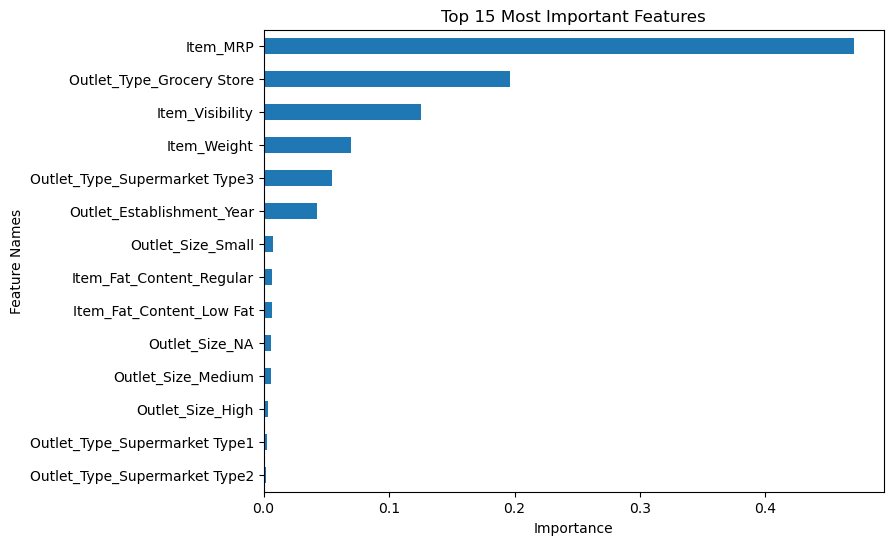

In [154]:
evaluate_regression(loaded_model,X_train_df, y_train, X_test_df,y_test)
loaded_importances = get_importances(loaded_model)
plot_importance_color(loaded_importances,top_n=15,color_dict=None);

### Linear Regression

In [157]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
loaded_model = loaded['LinearRegression']

Training Data:	R^2= 0.56	RMSE= 1116.09
Test Data:	R^2= 0.56	RMSE= 1162.62


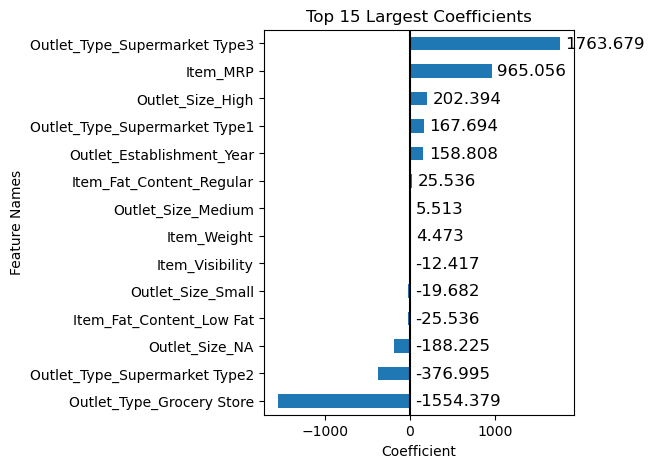

In [160]:
evaluate_regression(loaded_model,X_train_df, y_train, X_test_df,y_test)
ax = plot_coeffs(coeffs, top_n=15)
annotate_hbars(ax)